In [ ]:
!nvidia-smi

yThu Dec 21 03:06:46 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+-

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8



In [ ]:
!pip install ultralytics==8.0.28

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/107.7 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## Inference with Pre-trained COCO Model

In [ ]:
%cd {HOME}
!yolo
 task=segment
 mode=predict
 model=yolov8m-seg.pt
 conf=0.25
 source='https://media.roboflow.com/notebooks/examples/dog.jpeg'
 save=true

/content
100% 52.4M/52.4M [00:00<00:00, 257MB/s]
2024-01-28 23:33:09.577621: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-28 23:33:09.577673: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-28 23:33:09.579292: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-28 23:33:10.993698: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU
YOLOv8m-seg summary (fused): 245 layers, 27268704 parameters, 0 gradients, 110.2 GFLOPs

100% 104k/104k [00:00<00:00, 75.7MB/s]
i

/content


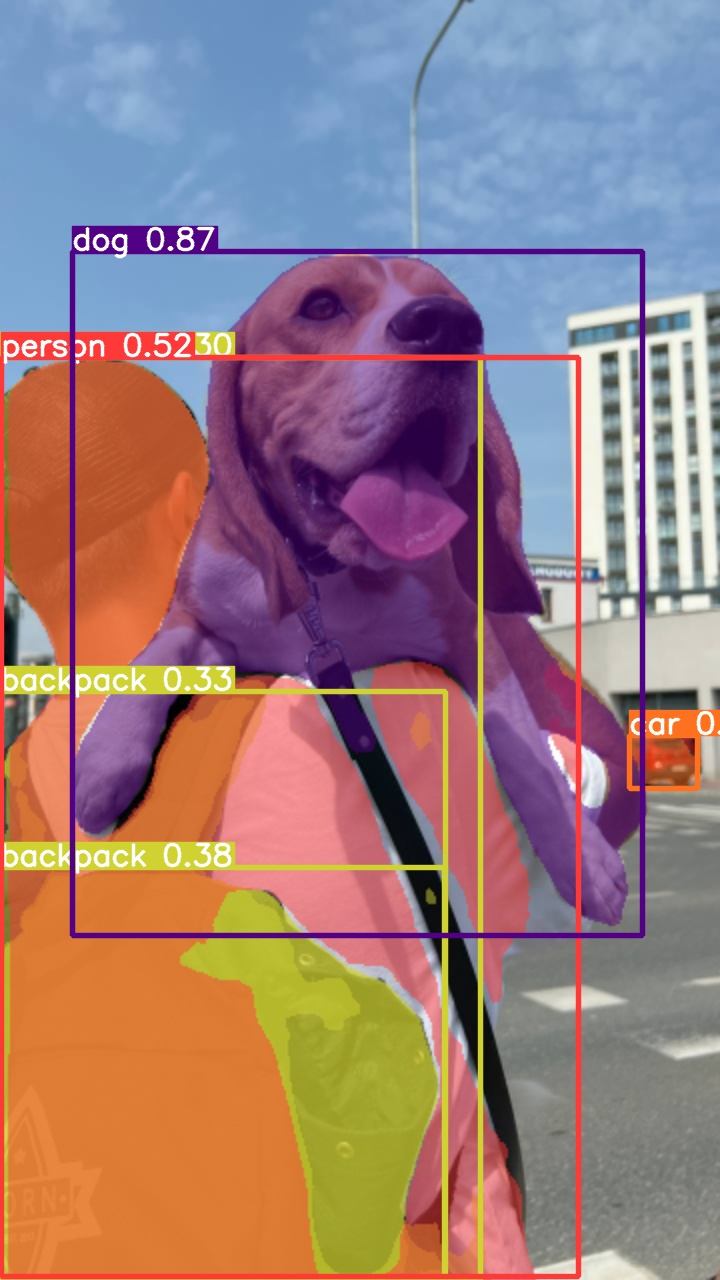

In [ ]:
%cd {HOME}
Image(filename='runs/segment/predict/dog.jpeg', height=600)

## Preparing a custom dataset (Coral Seg)

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet --use-deprecated=legacy-resolver

from roboflow import Roboflow
rf = Roboflow(api_key="COwTGuKIpvzon2O8MJI4")
project = rf.workspace("tugas-akhir-c3gmk").project("coral-segmentation-1")
dataset = project.version(1).download("yolov8")

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.0/70.0 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.5 MB/s eta 0:00:00
ERROR: pip's legacy dependency resolver does not consider dependency conflicts when selecting packages. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
loading Roboflow wo


Extracting Dataset Version Zip to Coral-Segmentation-1-1 in yolov8:: 100%|██████████| 1522/1522 [00:00<00:00, 2625.61it/s]


# YOLOv8 Medium W/O Preprocess YOLOv8m-Wp

## Model Training

In [ ]:
%cd {HOME}

!yolo
 task=segment
 mode=train
 model=yolov8m-seg.pt
 data={dataset.location}/data.yaml
 epochs=25
 imgsz=640

/content
100% 52.4M/52.4M [00:00<00:00, 156MB/s]
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8m-seg.pt, data=/content/datasets/Coral-Segmentation-1-1/data.yaml, epochs=25, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False,

In [ ]:
!ls {HOME}/runs/segment/train/

args.yaml					    MaskPR_curve.png	train_batch572.jpg
BoxF1_curve.png					    MaskR_curve.png	val_batch0_labels.jpg
BoxP_curve.png					    results.csv		val_batch0_pred.jpg
BoxPR_curve.png					    results.png		val_batch1_labels.jpg
BoxR_curve.png					    train_batch0.jpg	val_batch1_pred.jpg
confusion_matrix.png				    train_batch1.jpg	val_batch2_labels.jpg
events.out.tfevents.1703128080.65e2a506f8ad.1921.0  train_batch2.jpg	val_batch2_pred.jpg
MaskF1_curve.png				    train_batch570.jpg	weights
MaskP_curve.png					    train_batch571.jpg


/content


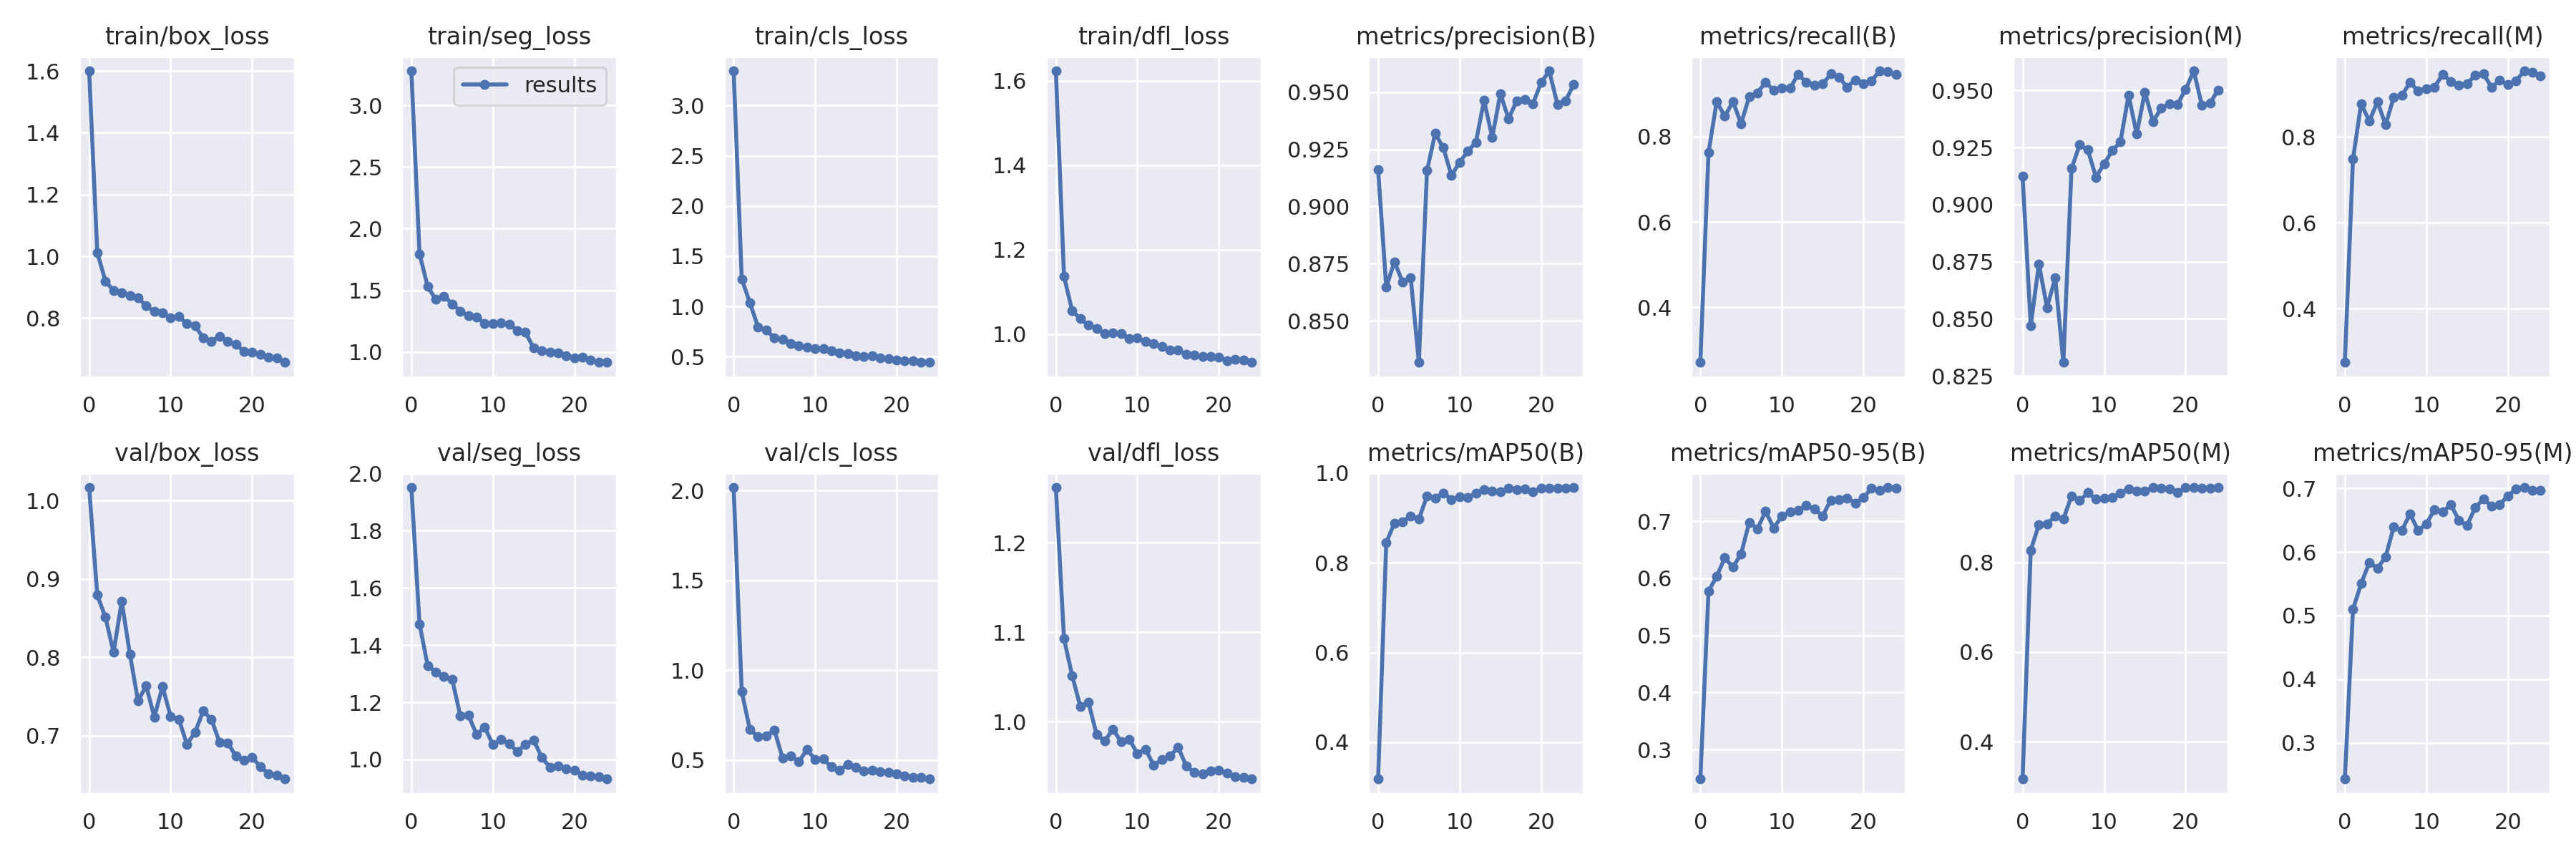

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/results.png', width=600)

/content


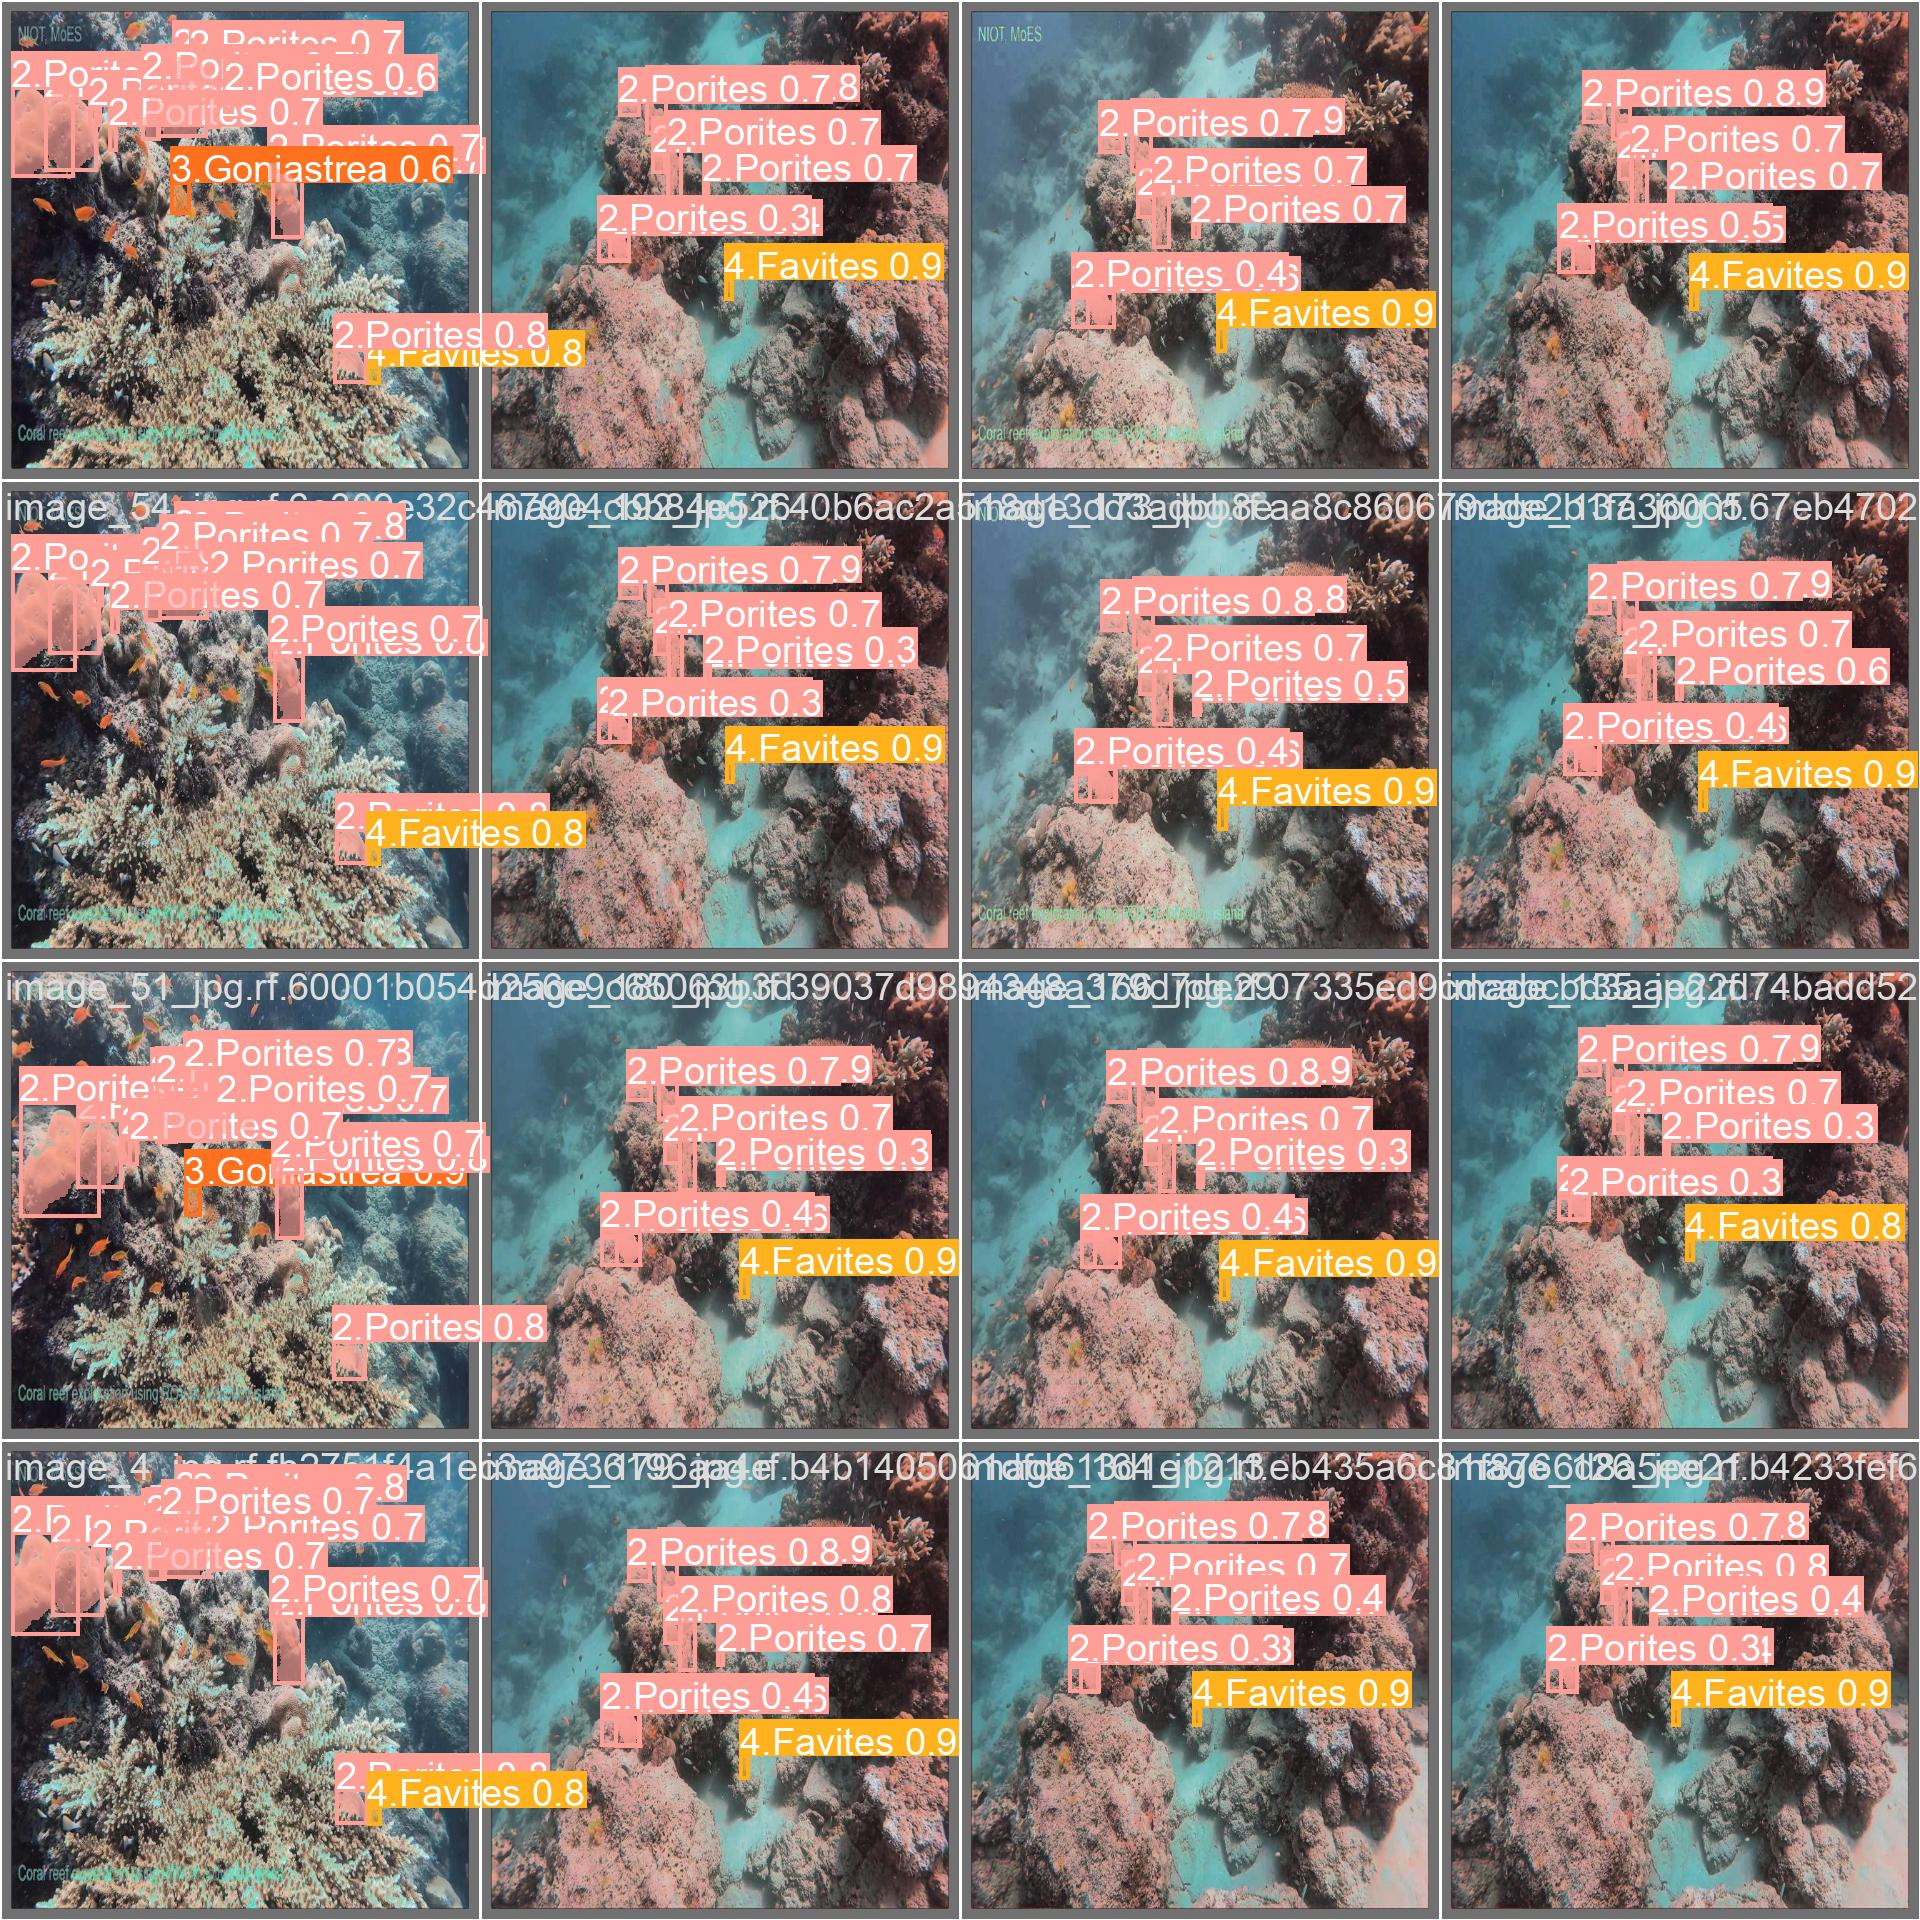

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/val_batch1_pred.jpg', width=600)

## Validate Model

In [ ]:
%cd {HOME}

!yolo task=segment mode=val model={HOME}/runs/segment/train/weights/best.pt data={dataset.location}/data.yaml

/content
2023-12-21 03:28:21.221367: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-21 03:28:21.221429: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-21 03:28:21.223366: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-21 03:28:23.424719: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-seg summary (fused): 245 layers, 27225858 parameters, 0 gradients, 110.0 GFLOPs
val: Scanning /content/datasets/Coral-Segmentation-1-1/va

## Inference

In [ ]:
%cd {HOME}
!yolo task=segment mode=predict model={HOME}/runs/segment/train/weights/best.pt conf=0.25 source={HOME}/datasets/Coral-Segmentation-1-1/test/images/frame_1466_jpg.rf.b134194fabc220b7644c3a10aebd24aa.jpg save=true

/content
2023-12-21 03:28:54.200315: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-21 03:28:54.200368: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-21 03:28:54.201585: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-21 03:28:55.408859: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-seg summary (fused): 245 layers, 27225858 parameters, 0 gradients, 110.0 GFLOPs

image 1/1 /content/datasets/Coral-Segmentation-1-1/test/

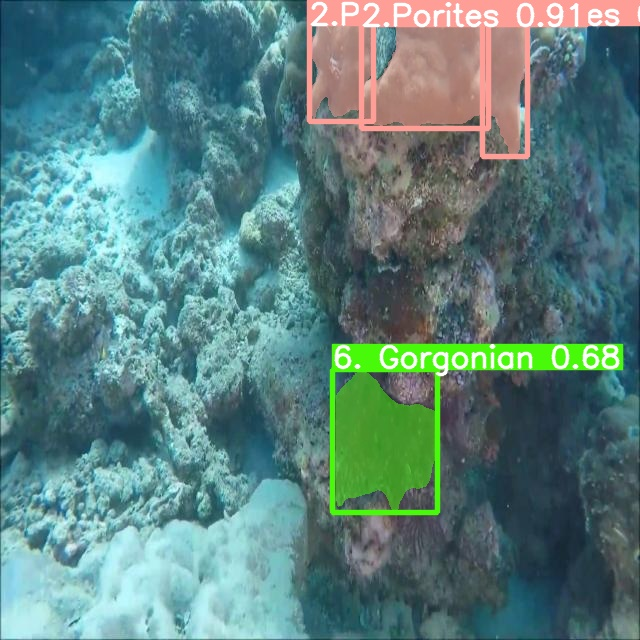

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict2/*.jpg')[:3]:
      display(Image(filename=image_path, height=600))
      print("\n")

In [ ]:
%cd {HOME}
!yolo task=segment mode=predict model={HOME}/drive/MyDrive/Yolov8mNoPreprocess/runs/segment/train/weights/best.pt conf=0.25 source={HOME}/datasets/Coral-Segmentation-1-1/test/images/frame_1466_jpg.rf.b134194fabc220b7644c3a10aebd24aa.jpg save=true

/content
2024-01-28 23:53:06.547629: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-28 23:53:06.547773: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-28 23:53:06.552115: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-28 23:53:08.682180: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU
YOLOv8m-seg summary (fused): 245 layers, 27225858 parameters, 0 gradients, 110.0 GFLOPs

image 1/1 /content/datasets/Coral-Segmentation-1-1/test/images/frame_1466_jpg.rf

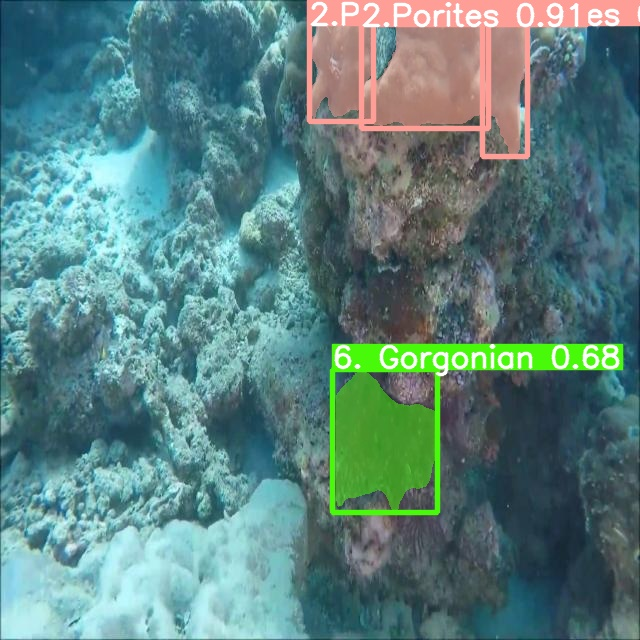

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict2/*.jpg')[:3]:
      display(Image(filename=image_path, height=600))
      print("\n")

In [ ]:
%cd {HOME}
!yolo task=segment mode=predict model={HOME}/drive/MyDrive/Yolov8mNoPreprocess/runs/segment/train/weights/best.pt conf=0.25 source={HOME}/datasets/Coral-Segmentation-1-1/test/images/frame_1811_jpg.rf.15a02d1cc4e278b2ebe7a0eaafa55616.jpg save=true

/content
2024-01-28 23:58:02.253018: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-28 23:58:02.253104: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-28 23:58:02.255477: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-28 23:58:04.007164: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU
YOLOv8m-seg summary (fused): 245 layers, 27225858 parameters, 0 gradients, 110.0 GFLOPs

image 1/1 /content/datasets/Coral-Segmentation-1-1/test/images/frame_1811_jpg.rf

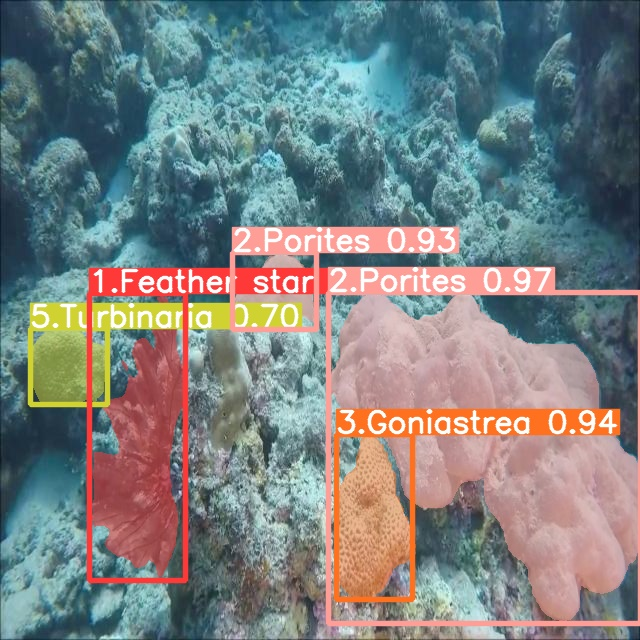

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict3/*.jpg')[:3]:
      display(Image(filename=image_path, height=600))
      print("\n")

In [ ]:
%cd {HOME}
!yolo task=segment mode=predict model={HOME}/drive/MyDrive/Yolov8mNoPreprocess/runs/segment/train/weights/best.pt conf=0.25 source={HOME}/datasets/Coral-Segmentation-1-1/test/images/frame_3426_jpg.rf.ff6b580f3c0d4828f483e22d1175eb8d.jpg save=true

/content
2024-01-28 23:59:59.856764: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-28 23:59:59.856843: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-28 23:59:59.858577: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-29 00:00:01.595484: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU
YOLOv8m-seg summary (fused): 245 layers, 27225858 parameters, 0 gradients, 110.0 GFLOPs

image 1/1 /content/datasets/Coral-Segmentation-1-1/test/images/frame_3426_jpg.rf

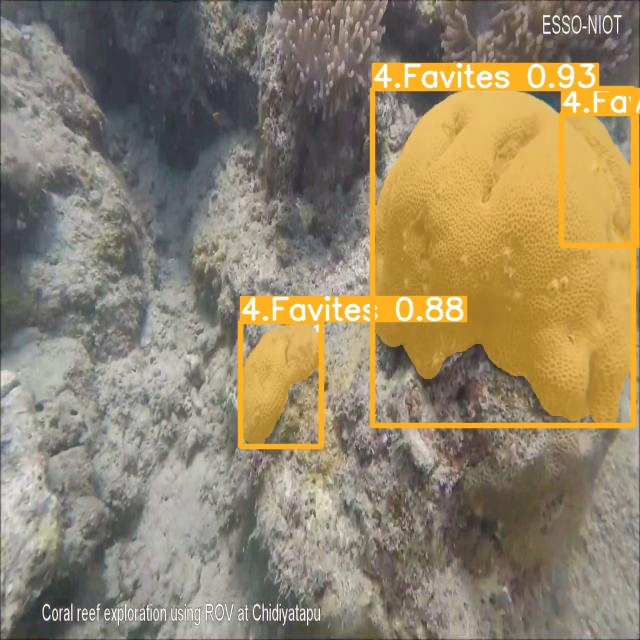

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict4/*.jpg')[:3]:
      display(Image(filename=image_path, height=600))
      print("\n")

In [ ]:
%cd {HOME}
!yolo task=segment mode=predict model={HOME}/drive/MyDrive/Yolov8mNoPreprocess/runs/segment/train/weights/best.pt conf=0.25 source={HOME}/datasets/Coral-Segmentation-1-1/test/images/image_75_jpg.rf.c5adc6bdd727b5794b290bfef81c2ddb.jpg save=true

/content
2024-01-29 00:03:11.358331: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-29 00:03:11.358405: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-29 00:03:11.360313: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-29 00:03:13.157715: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU
YOLOv8m-seg summary (fused): 245 layers, 27225858 parameters, 0 gradients, 110.0 GFLOPs

image 1/1 /content/datasets/Coral-Segmentation-1-1/test/images/image_75_jpg.rf.c

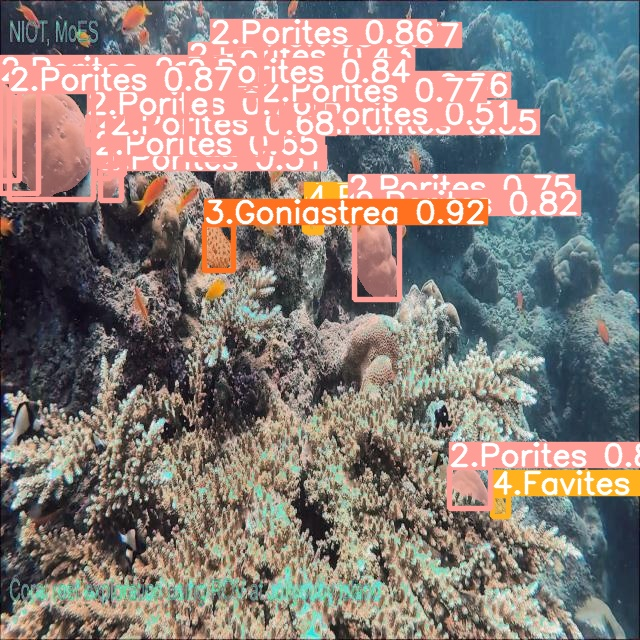

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict5/*.jpg')[:3]:
      display(Image(filename=image_path, height=600))
      print("\n")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip Yolov8mruns.zip

Archive:  Yolov8mruns.zip
   creating: content/runs/
   creating: content/runs/segment/
   creating: content/runs/segment/predict/
  inflating: content/runs/segment/predict/dog.jpeg  
   creating: content/runs/segment/train/
  inflating: content/runs/segment/train/BoxPR_curve.png  
  inflating: content/runs/segment/train/MaskR_curve.png  
  inflating: content/runs/segment/train/val_batch2_labels.jpg  
  inflating: content/runs/segment/train/train_batch2.jpg  
  inflating: content/runs/segment/train/train_batch572.jpg  
  inflating: content/runs/segment/train/BoxF1_curve.png  
  inflating: content/runs/segment/train/val_batch0_labels.jpg  
   creating: content/runs/segment/train/weights/
  inflating: content/runs/segment/train/weights/best.pt  
  inflating: content/runs/segment/train/weights/last.pt  
  inflating: content/runs/segment/train/train_batch0.jpg  
  inflating: content/runs/segment/train/events.out.tfevents.1703128080.65e2a506f8ad.1921.0  
  inflating: content/runs/segment/tr

In [ ]:
!yolo task=segment mode=predict model={HOME}/runs/segment/train/weights/best.pt conf=0.25 source=/content/coralvids.mp4 save=true

2023-12-21 04:16:29.072701: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-21 04:16:29.072748: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-21 04:16:29.074056: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-21 04:16:30.071392: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-seg summary (fused): 245 layers, 27225858 parameters, 0 gradients, 110.0 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
video 1/1 (1/2605) /con

In [ ]:
!zip -r /content/Yolov8mruns.zip /content/runs

In [ ]:
from google.colab import files
files.download("/content/Yolov8mruns.zip")

## Save & Deploy model



In [ ]:
project.version(dataset.version).deploy(model_type="yolov8-seg", model_path=f"{HOME}/runs/segment/train/")

Dependency ultralytics==8.0.196 is required but found version=8.0.28, to fix: `pip install ultralytics==8.0.196`
Would you like to continue with the wrong version of ultralytics? y/n: y
An error occured when getting the model upload URL: This version already has a trained model. Please generate and train a new version in order to upload model to Roboflow.
